/var/folders/29/yzpf4dbd3n19bxxhqjb8d35c0000gn/T/ipykernel_15317/100842190.py:12: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal = np.fromstring(signal, "int16")


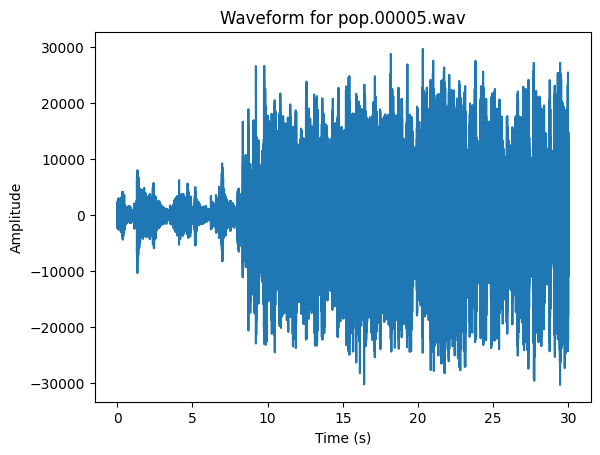

In [28]:
# https://stackoverflow.com/a/25095962

import matplotlib.pyplot as plt
import numpy as np
import wave
import sys

spf = wave.open("./data/genres_original/pop/pop.00005.wav", "r")

# get sample values
signal = spf.readframes(-1)
signal = np.fromstring(signal, "int16")
fs = spf.getframerate()

# 2 channel (stero)
if spf.getnchannels() == 2:
    print("Just mono files")
    sys.exit(0)

Time = np.linspace(0, len(signal) / fs, num=len(signal))

plt.figure(1)
plt.title("Waveform for pop.00005.wav")
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.plot(Time, signal)

plt.savefig("./output/waveform_pop_00005.png")

plt.show()

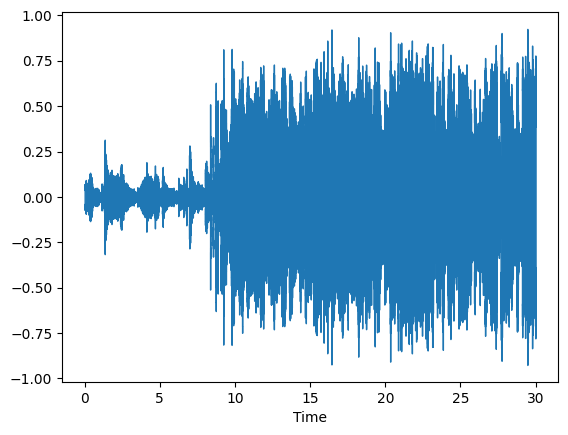

In [29]:
import librosa
import librosa.display

filename = './data/genres_original/pop/pop.00005.wav'
y, sr = librosa.load(filename)
# trim silent edges
song, _ = librosa.effects.trim(y)
librosa.display.waveshow(song, sr=sr);


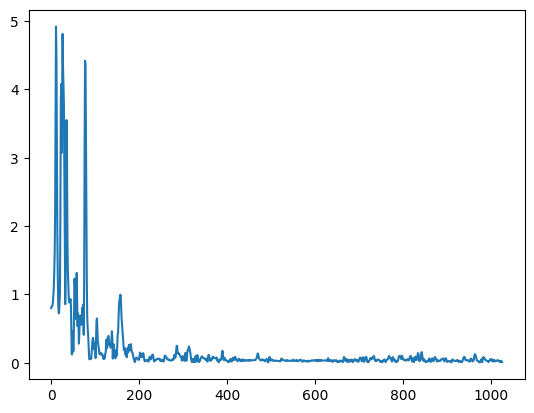

In [91]:
import numpy as np
import matplotlib.pyplot as plt

n_fft = 2048
D = np.abs(librosa.stft(song[:n_fft], n_fft=n_fft, hop_length=n_fft+1))
plt.plot(D);

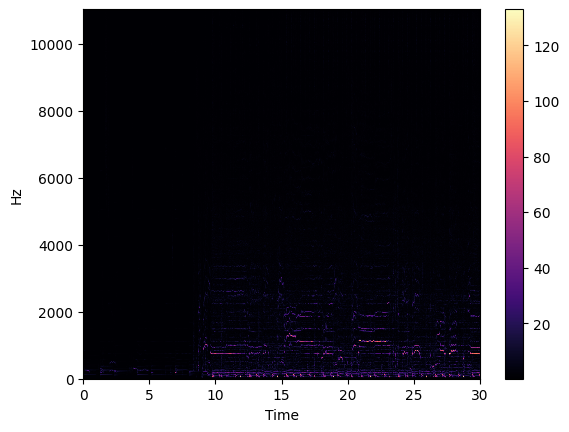

In [5]:
hop_length = 512
D = np.abs(librosa.stft(song, n_fft=n_fft,  hop_length=hop_length))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear');
plt.colorbar();

[[-80.       -80.       -80.       ... -80.       -61.35664  -58.90957 ]
 [-80.       -80.       -80.       ... -80.       -60.593185 -58.084377]
 [-80.       -80.       -80.       ... -80.       -59.92668  -56.869602]
 ...
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]]


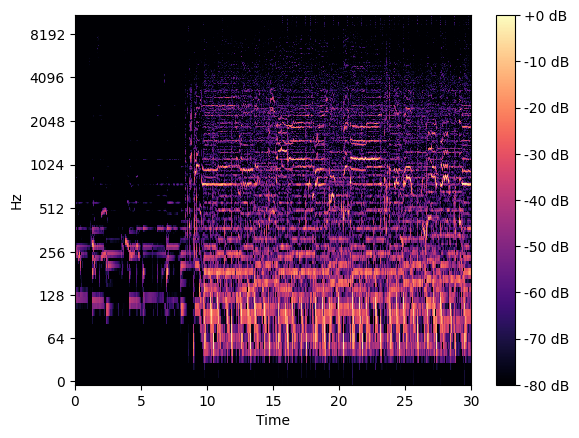

In [24]:
DB = librosa.amplitude_to_db(D**2, ref=np.max)
print(DB)
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');

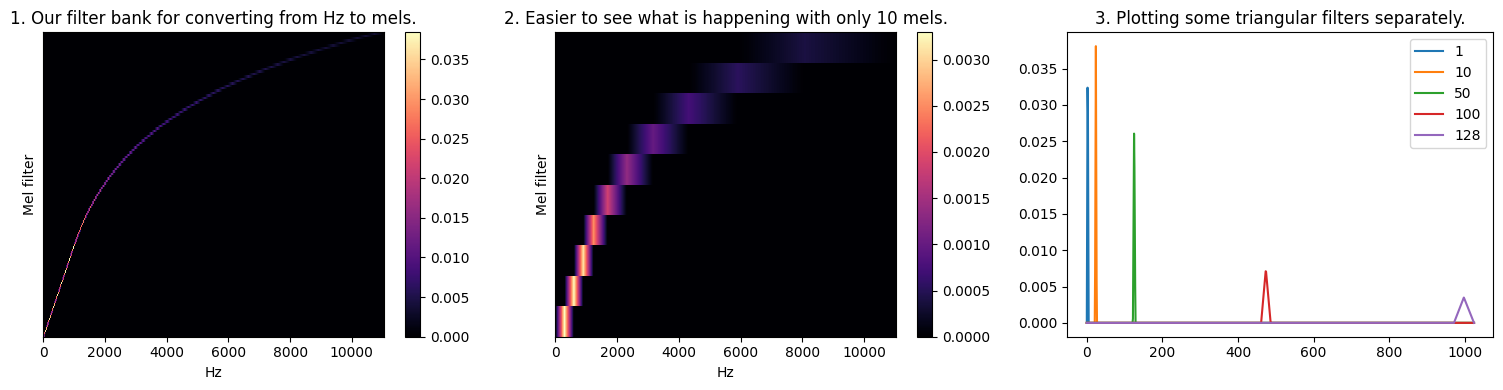

In [31]:
n_mels = 128
mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)
plt.figure(figsize=(15, 4));

plt.subplot(1, 3, 1);
librosa.display.specshow(mel, sr=sr, hop_length=hop_length, x_axis='linear');
plt.ylabel('Mel filter');
plt.colorbar();
plt.title('1. Our filter bank for converting from Hz to mels.');

plt.subplot(1, 3, 2);
mel_10 = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=10)
librosa.display.specshow(mel_10, sr=sr, hop_length=hop_length, x_axis='linear');
plt.ylabel('Mel filter');
plt.colorbar();
plt.title('2. Easier to see what is happening with only 10 mels.');

plt.subplot(1, 3, 3);
idxs_to_plot = [0, 9, 49, 99, 127]
for i in idxs_to_plot:
    plt.plot(mel[i]);
plt.legend(labels=[f'{i+1}' for i in idxs_to_plot]);
plt.title('3. Plotting some triangular filters separately.');

plt.tight_layout();

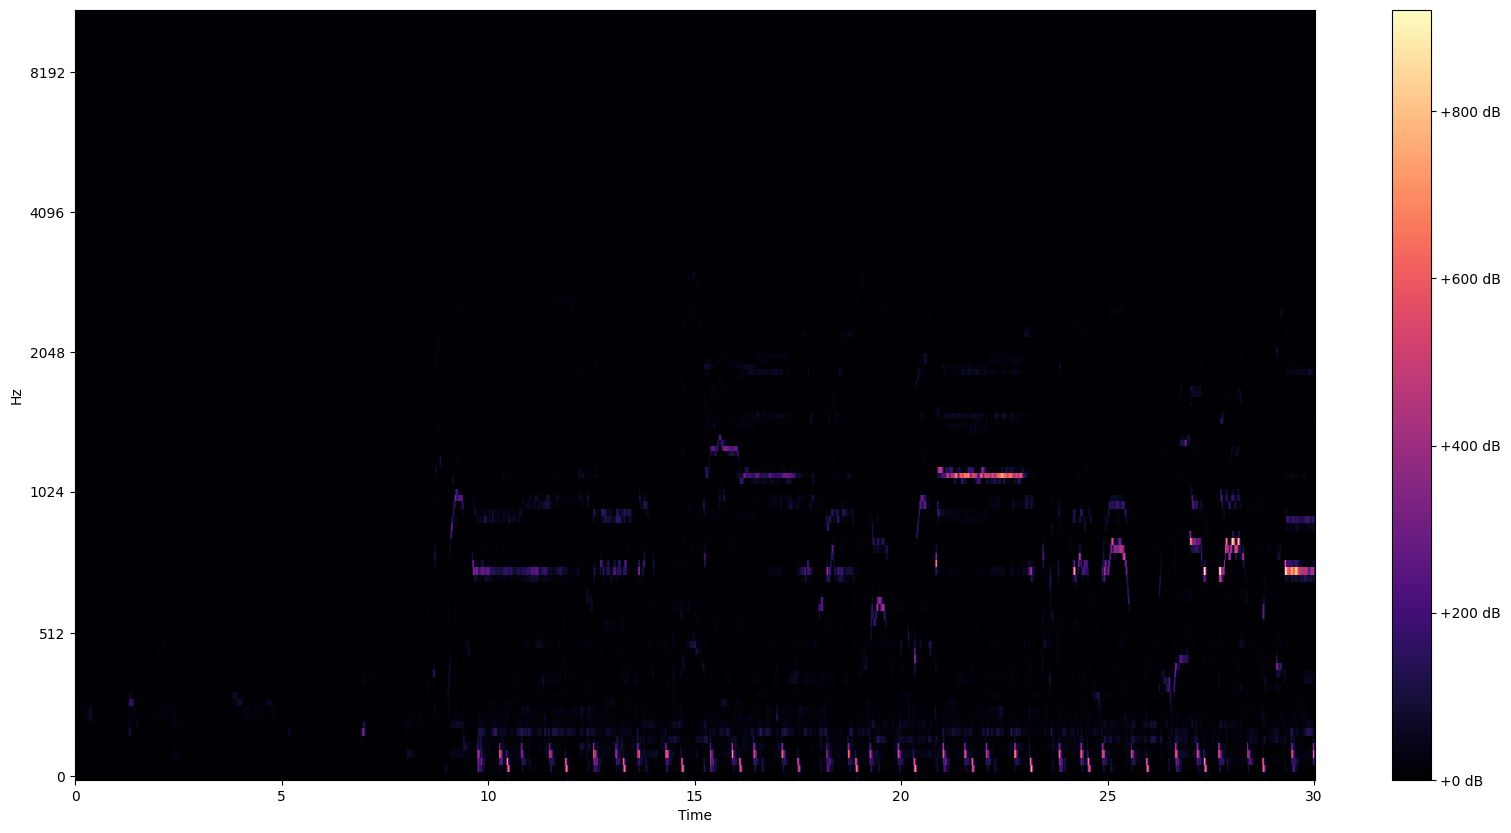

In [97]:
S = librosa.feature.melspectrogram(y=song, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, power=4)
S_DB = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(20,10))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');

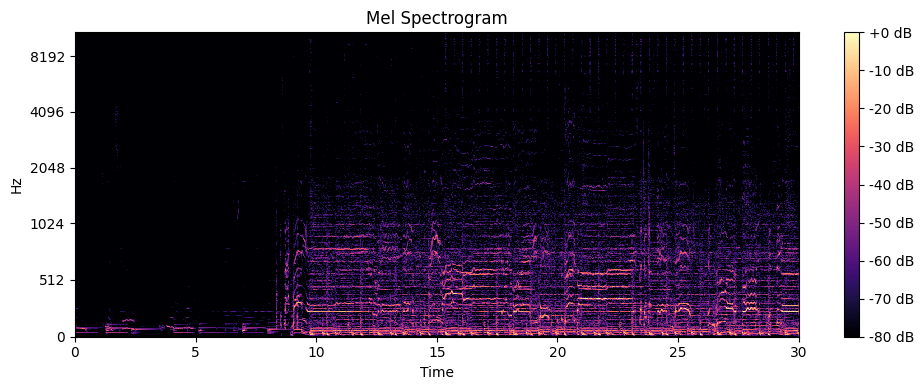

In [104]:
n_fft = 2048  # Number of samples per FFT
hop_length = 512  # Number of samples between successive frames
stft = librosa.stft(y=song, n_fft=n_fft, hop_length=hop_length)
D = np.abs(stft)**4
# D = librosa.feature.melspectrogram(S=D, sr=sr, n_mels=128)
S_DB = librosa.power_to_db(D, ref=np.max)
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(10, 4))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()